In [ ]:
import pandas as pd

# Load the dataset

df = pd.read_csv('airbnb.csv')

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  int64  
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  int64  
 14  minstay               0 non-null      float64
 15  name               

(None,
     room_id  survey_id    host_id        room_type  country       city  \
 0  20003728       1476   26861783  Entire home/apt      NaN  Amsterdam   
 1  19996091       1476   16570501  Entire home/apt      NaN  Amsterdam   
 2  19995673       1476   29090025  Entire home/apt      NaN  Amsterdam   
 3  19995327       1476  127510535  Entire home/apt      NaN  Amsterdam   
 4  19995246       1476   41994173  Entire home/apt      NaN  Amsterdam   
 
    borough            neighborhood  reviews  overall_satisfaction  \
 0      NaN            Centrum Oost        0                   0.0   
 1      NaN  De Baarsjes / Oud West        0                   0.0   
 2      NaN  De Baarsjes / Oud West        0                   0.0   
 3      NaN            Centrum Oost        0                   0.0   
 4      NaN            Centrum West        0                   0.0   
 
    accommodates  bedrooms  bathrooms  price  minstay  \
 0             4         2        NaN    270      NaN   
 1   

In [47]:
# Drop completely empty columns
df_cleaned = df.drop(columns=['country', 'borough', 'bathrooms', 'minstay'])

# Fill missing values in 'name' column with 'Unknown'
df_cleaned.loc[:, 'name'] = df_cleaned['name'].fillna('Unknown')

# Drop duplicate rows if any
df_cleaned.drop_duplicates(inplace=True)

# Convert 'last_modified' to datetime format
df_cleaned['last_modified'] = pd.to_datetime(df_cleaned['last_modified'])

# Display cleaned dataset info
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   room_id               18723 non-null  int64         
 1   survey_id             18723 non-null  int64         
 2   host_id               18723 non-null  int64         
 3   room_type             18723 non-null  object        
 4   city                  18723 non-null  object        
 5   neighborhood          18723 non-null  object        
 6   reviews               18723 non-null  int64         
 7   overall_satisfaction  18723 non-null  float64       
 8   accommodates          18723 non-null  int64         
 9   bedrooms              18723 non-null  int64         
 10  price                 18723 non-null  int64         
 11  name                  18723 non-null  object        
 12  last_modified         18723 non-null  datetime64[ns]
 13  latitude        

(None,
     room_id  survey_id    host_id        room_type       city  \
 0  20003728       1476   26861783  Entire home/apt  Amsterdam   
 1  19996091       1476   16570501  Entire home/apt  Amsterdam   
 2  19995673       1476   29090025  Entire home/apt  Amsterdam   
 3  19995327       1476  127510535  Entire home/apt  Amsterdam   
 4  19995246       1476   41994173  Entire home/apt  Amsterdam   
 
              neighborhood  reviews  overall_satisfaction  accommodates  \
 0            Centrum Oost        0                   0.0             4   
 1  De Baarsjes / Oud West        0                   0.0             3   
 2  De Baarsjes / Oud West        0                   0.0             2   
 3            Centrum Oost        0                   0.0             6   
 4            Centrum West        0                   0.0             2   
 
    bedrooms  price                                               name  \
 0         2    270   2-floor apartment in the centre with canal view

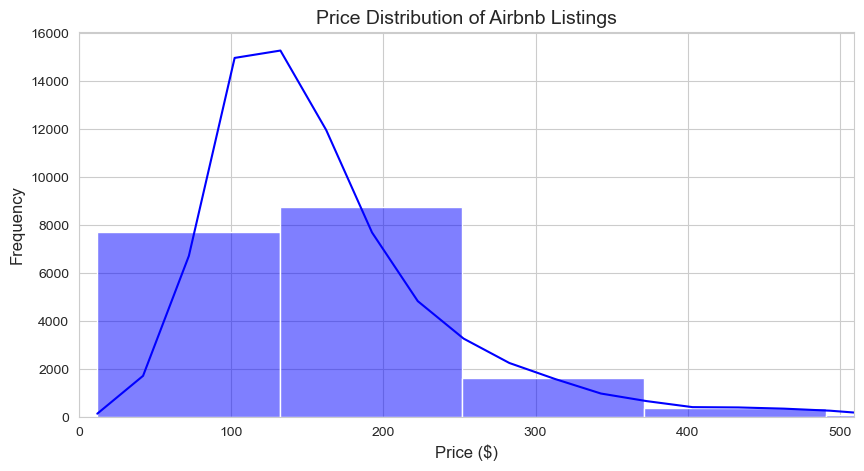

count    18723.000000
mean       166.599477
std        108.943849
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot distribution of prices
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['price'], bins=50, kde=True, color="blue")
plt.title("Price Distribution of Airbnb Listings", fontsize=14)
plt.xlabel("Price ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, df_cleaned['price'].quantile(0.99))  # Limit to 99th percentile to remove extreme outliers
plt.show()

# Display basic statistics
df_cleaned['price'].describe()


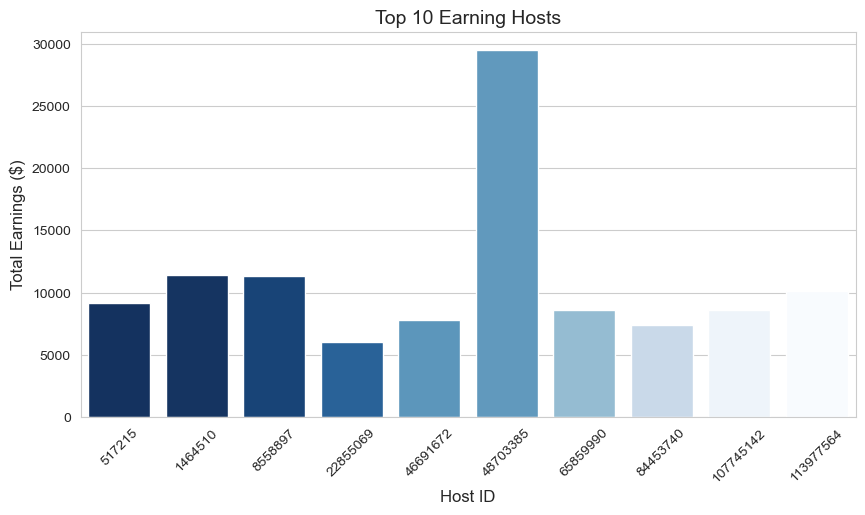

host_id
48703385     29493
1464510      11397
8558897      11300
113977564    10098
517215        9143
107745142     8622
65859990      8581
46691672      7779
84453740      7412
22855069      6000
Name: price, dtype: int64

In [43]:
# Identify top-earning hosts by aggregating total earnings
top_hosts = df_cleaned.groupby('host_id')['price'].sum().sort_values(ascending=False).head(10)

# Plot top-earning hosts
plt.figure(figsize=(10, 5))
sns.barplot(x=top_hosts.index, 
            y=top_hosts.values,
            hue = top_hosts.index, 
            palette="Blues_r",
            legend=False)
plt.xticks(rotation=45)
plt.title("Top 10 Earning Hosts", fontsize=14)
plt.xlabel("Host ID", fontsize=12)
plt.ylabel("Total Earnings ($)", fontsize=12)
plt.show()

# Display top-earning hosts data
top_hosts


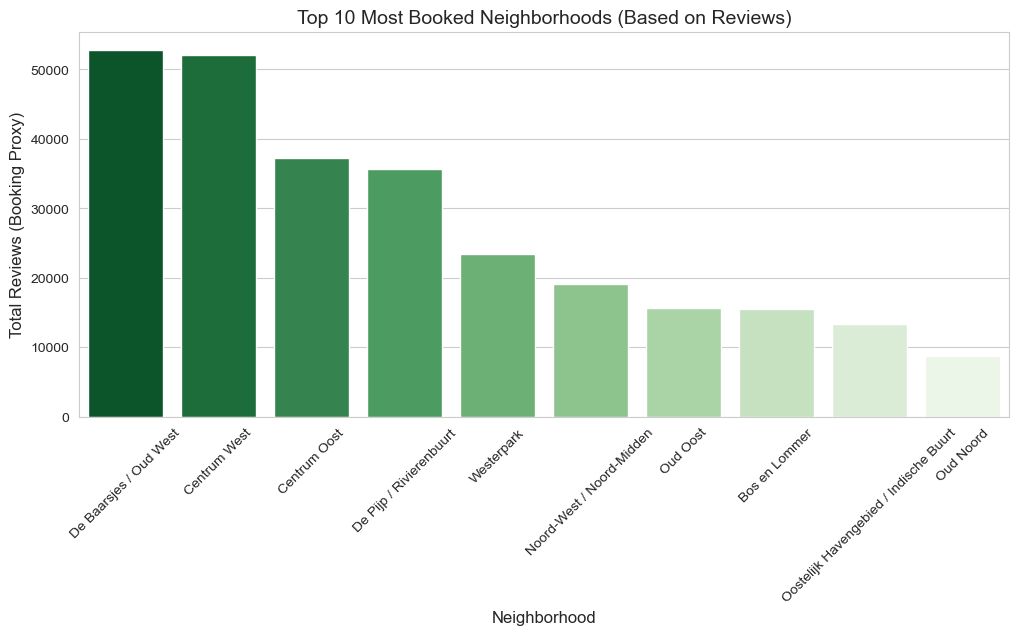

neighborhood
De Baarsjes / Oud West                    52823
Centrum West                              52115
Centrum Oost                              37221
De Pijp / Rivierenbuurt                   35627
Westerpark                                23433
Noord-West / Noord-Midden                 19097
Oud Oost                                  15615
Bos en Lommer                             15481
Oostelijk Havengebied / Indische Buurt    13284
Oud Noord                                  8666
Name: reviews, dtype: int64

In [37]:
# Identify most booked neighborhoods (total number of reviews as a proxy for bookings)
top_neighborhoods = df_cleaned.groupby('neighborhood')['reviews'].sum().sort_values(ascending=False).head(10)

# Plot most booked neighborhoods
plt.figure(figsize=(12, 5))
sns.barplot(
    x=top_neighborhoods.index, 
    y=top_neighborhoods.values, 
    hue=top_neighborhoods.index,  # Assigning hue to the x variable
    palette="Greens_r", 
    legend=False  
)
plt.xticks(rotation=45)
plt.title("Top 10 Most Booked Neighborhoods (Based on Reviews)", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Total Reviews (Booking Proxy)", fontsize=12)
plt.show()

# Display top booked neighborhoods data
top_neighborhoods


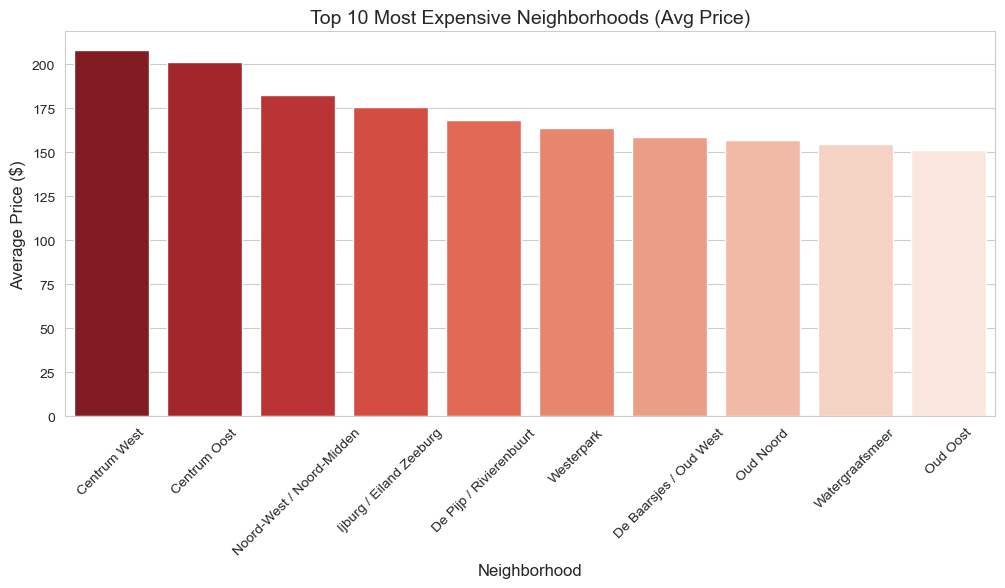

neighborhood
Centrum West                 208.312809
Centrum Oost                 201.224277
Noord-West / Noord-Midden    182.730606
Ijburg / Eiland Zeeburg      175.878307
De Pijp / Rivierenbuurt      168.342304
Westerpark                   163.756643
De Baarsjes / Oud West       159.007601
Oud Noord                    156.979757
Watergraafsmeer              154.673114
Oud Oost                     151.612489
Name: price, dtype: float64

In [31]:
# Calculate average price per neighborhood
avg_price_neighborhood = df_cleaned.groupby("neighborhood")["price"].mean().sort_values(ascending=False).head(10)

# Plot average price by neighborhood
plt.figure(figsize=(12, 5))
sns.barplot(
    x=avg_price_neighborhood.index, 
    y=avg_price_neighborhood.values, 
    hue=avg_price_neighborhood.index,  # Assigning hue to the x variable
    palette="Reds_r", 
    legend=False  
)


plt.xticks(rotation=45)
plt.title("Top 10 Most Expensive Neighborhoods (Avg Price)", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.show()

# Display top 10 most expensive neighborhoods by average price
avg_price_neighborhood


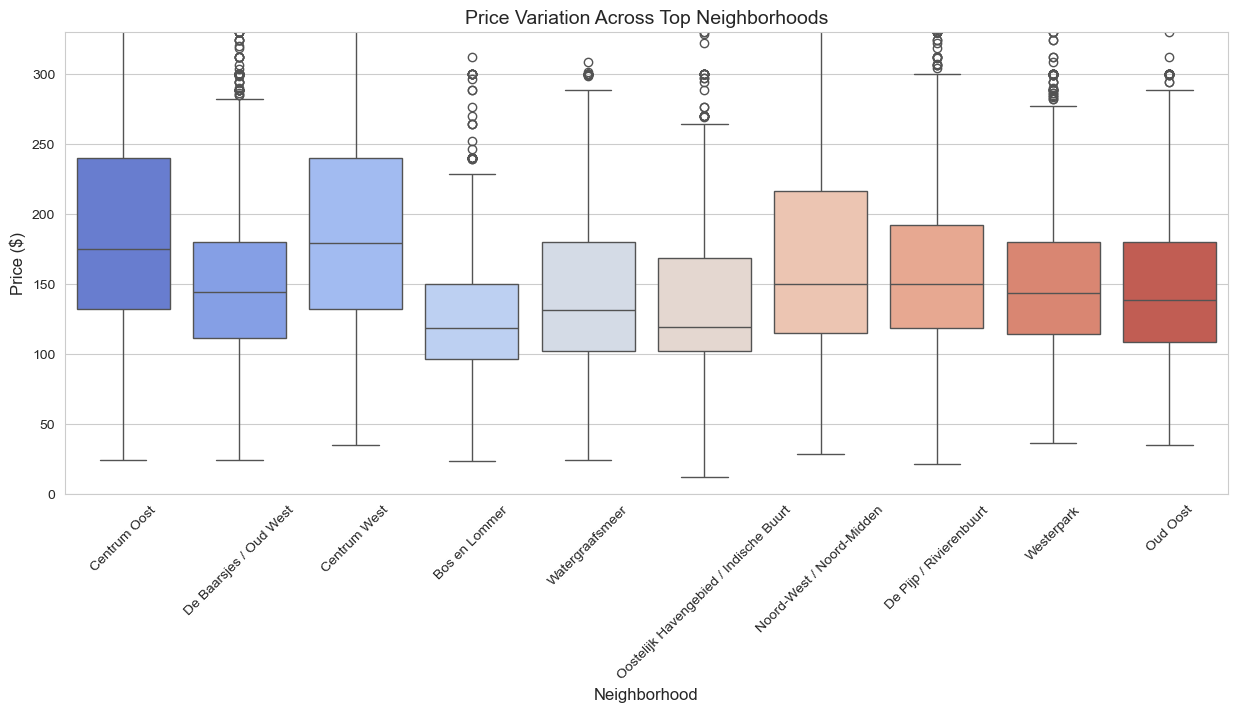

In [39]:
# Plot boxplot for price distribution across neighborhoods
plt.figure(figsize=(15, 6))
top_neighborhoods = df_cleaned['neighborhood'].value_counts().head(10).index  # Top 10 most common neighborhoods
sns.boxplot(
    data=df_cleaned[df_cleaned['neighborhood'].isin(top_neighborhoods)],
    x='neighborhood', 
    y='price', 
    hue='neighborhood',   # assign hue to the same variable
    palette="coolwarm",
    dodge=False,
    legend=False
)
plt.xticks(rotation=45)
plt.ylim(0, df_cleaned['price'].quantile(0.95))  # Limit outliers for better visualization
plt.title("Price Variation Across Top Neighborhoods", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.show()


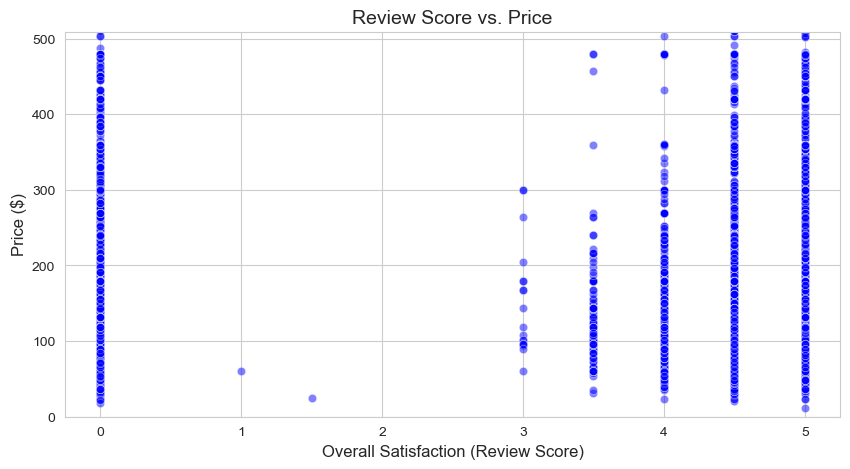

,overall_satisfaction,price
overall_satisfaction,1.000000,-0.044775
price,-0.044775,1.000000


In [15]:
# Scatter plot: Review Score vs. Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cleaned, x='overall_satisfaction', y='price', alpha=0.5, color='blue')
plt.title("Review Score vs. Price", fontsize=14)
plt.xlabel("Overall Satisfaction (Review Score)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.ylim(0, df_cleaned['price'].quantile(0.99))  # Limit outliers for better visualization
plt.show()

# Calculate correlation
review_price_corr = df_cleaned[['overall_satisfaction', 'price']].corr()
review_price_corr


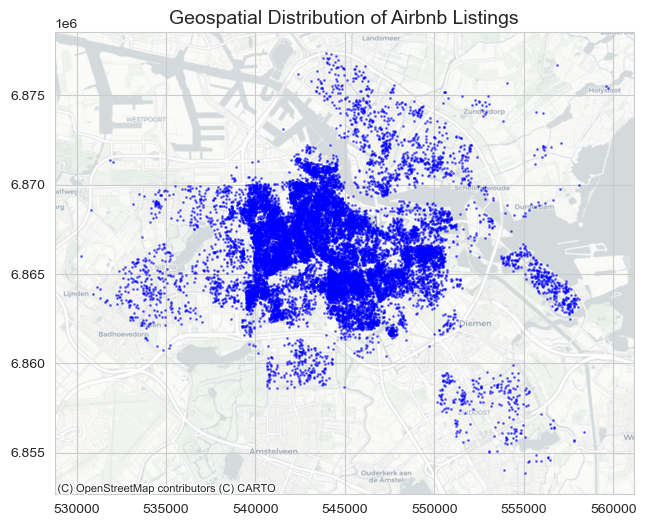

In [23]:
import geopandas as gpd
import contextily as ctx

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.longitude, df_cleaned.latitude), crs="EPSG:4326")

# Convert to Web Mercator for visualization
gdf = gdf.to_crs(epsg=3857)

# Plot geospatial data
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, markersize=1, color="blue", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add map background
ax.set_title("Geospatial Distribution of Airbnb Listings", fontsize=14)
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting relevant features for price prediction
features = ['accommodates', 'bedrooms', 'reviews', 'overall_satisfaction', 'latitude', 'longitude']
X = df_cleaned[features]
y = df_cleaned['price']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(47.45838451268359, 0.2623535552391656)

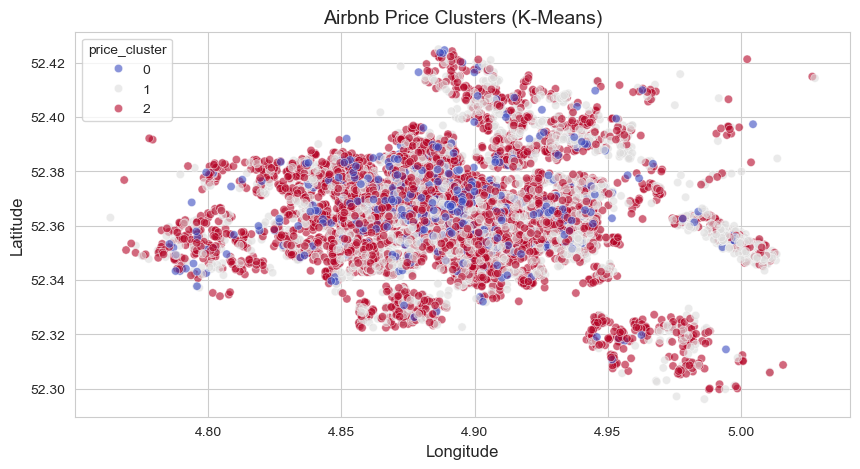

,price,accommodates,bedrooms,reviews
price_cluster,,,,
0,117.063861,2.462990,0.995646,152.171263
1,242.943736,4.369879,2.427163,9.848547
2,132.445642,2.247058,0.972430,12.399556


In [41]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
X_cluster = df_cleaned[['price', 'accommodates', 'bedrooms', 'reviews', 'latitude', 'longitude']]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X_cluster)

# Train K-Means with 3 clusters (Low, Medium, High price)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cleaned['price_cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing price clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_cleaned['longitude'], y=df_cleaned['latitude'], hue=df_cleaned['price_cluster'], palette="coolwarm", alpha=0.6)
plt.title("Airbnb Price Clusters (K-Means)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

# Cluster Centers (Avg values per cluster)
df_cleaned.groupby('price_cluster').mean(numeric_only=True)[['price', 'accommodates', 'bedrooms', 'reviews']]

